# Introduction 
- Notebook này chủ yếu tìm hiểu về những khái niệm cơ bản nhất trong việc phân tích dữ liệu Time series
- Trong khuôn khổ một bài viết mang tính tổng quan (mới học) chủ yếu các bài tham khảo đến từ các blog, website nhằm đưa ra một cái nhìn nhanh nhất và toàn diện về lĩnh vược :V 
 

In [2]:
import numpy as np 
import talib as ta 
import pandas as pd 
import matplotlib.pyplot as plt

- Time series là kiểu dữ liệu theo một chuỗi thời gian hay dữ liệu phụ thuộc vào thời gian (ngày, tháng năm, giờ,...). Một số ví dụ cụ thể có thể là dữ liệu về nhiệt độ trong ngày, tháng, dữ liệu về giá cổ phiểu, chứng khoán
- Phân tích dữ liệu time series (TSA) tức là phân tích dữ liệu kiểu này nhằm mục đích : 
    1. Hiểu cách dữ liệu hoạt động và những nhân tố ảnh hưởng tới giá trị của nó tại nhiều điểm trong một khoảng thời gian 
    2. Hỗ trợ cho việc dự đoán giá trị tương lai

- Thành phần của một Time Series: 
    1. Trend : dùng để miêu tả giá trị tăng hoặc giảm trong khoảng thời gian liên tục 
    2. Seasonality : sự lặp đi lặp lại của giá trị trong một khoảng thời gian cố định (thường là năm) ví dụ như trong khoảng 1 năm, doanh thu của công ty bán kem sẽ cao vào mùa hè 
    3. Unexpected events (irregularity): sự kiện xảy ra bất ngờ, không thể nắm bắt được, thay đổi một cách đột biến
    4. Cyclic : sự kiện thay đổi lặp đi lặp lại theo chiều hướng lên xong lại xuống và ngược lại

    ![Local Image](../Image/39815Components%20of%20Time%20Series%20Analysis.png)

# Data
- Sử dụng tập dữ liệu WTI Crude Oil trong khoảng từ 1/1/2010 - 31/12/2023 
- Dữ liệu được lấy từ [Insvesting.com](https://www.investing.com/commodities/crude-oil-historical-data)


In [32]:
data = pd.read_csv('..\Data\Bloomberg WTI Crude Oil Historical Data.csv')
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,81.6928,82.0794,82.7617,81.4199,NaN,-0.18%
1,12/28/2023,81.8406,84.5812,84.7517,81.7951,NaN,-3.19%
2,12/27/2023,84.5357,85.8661,86.1845,84.3196,NaN,-1.81%
3,12/26/2023,86.0936,83.8761,86.7645,83.4099,NaN,2.69%
4,12/22/2023,83.8420,84.9450,85.3999,83.6601,NaN,-0.45%


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3526 non-null   object 
 1   Price     3526 non-null   float64
 2   Open      3526 non-null   float64
 3   High      3526 non-null   float64
 4   Low       3526 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  3526 non-null   object 
dtypes: float64(5), object(2)
memory usage: 193.0+ KB


In [34]:
data['Date'] = pd.to_datetime(data['Date'])

In [35]:
data.index = data['Date']
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2023-12-29,2023-12-29,81.6928,82.0794,82.7617,81.4199,NaN,-0.18%
2023-12-28,2023-12-28,81.8406,84.5812,84.7517,81.7951,NaN,-3.19%
2023-12-27,2023-12-27,84.5357,85.8661,86.1845,84.3196,NaN,-1.81%
2023-12-26,2023-12-26,86.0936,83.8761,86.7645,83.4099,NaN,2.69%
2023-12-22,2023-12-22,83.8420,84.9450,85.3999,83.6601,NaN,-0.45%


## Decomposing time series data 
- Như đề cập ở trên, một time series sẽ được chia thành 3 phần chính là trend, seasonality và residual (cyclic và unexpect event) 
- Người ta có thể tách dựa vào 2 cách thức chính :
    1. Dựa vào phép nhân: $$ y_{t} = T_{t} * S_{t} * R_{t} $$
    2. Dựa vào phép cộng: $$ y_{t} = T_{t} + S_{t} + R_{t} $$ 

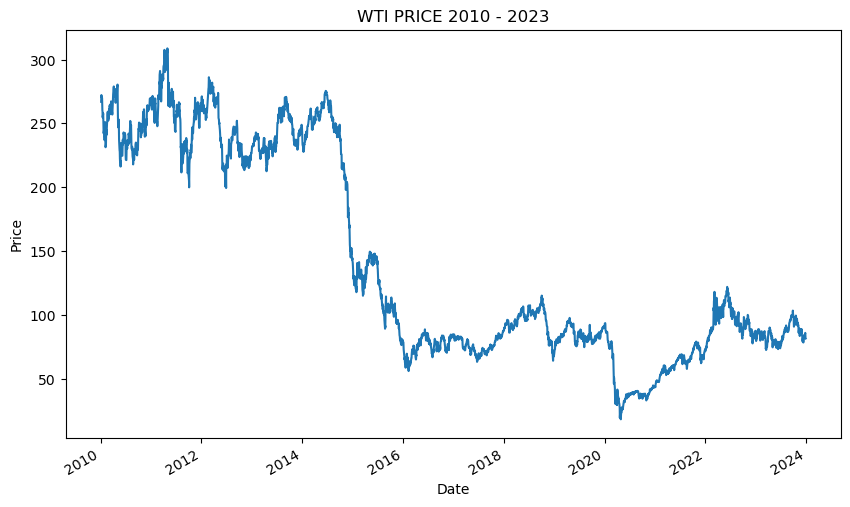

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (10, 6)

data['Price'].plot()
plt.ylabel("Price")
plt.title("WTI PRICE 2010 - 2023")
plt.show()

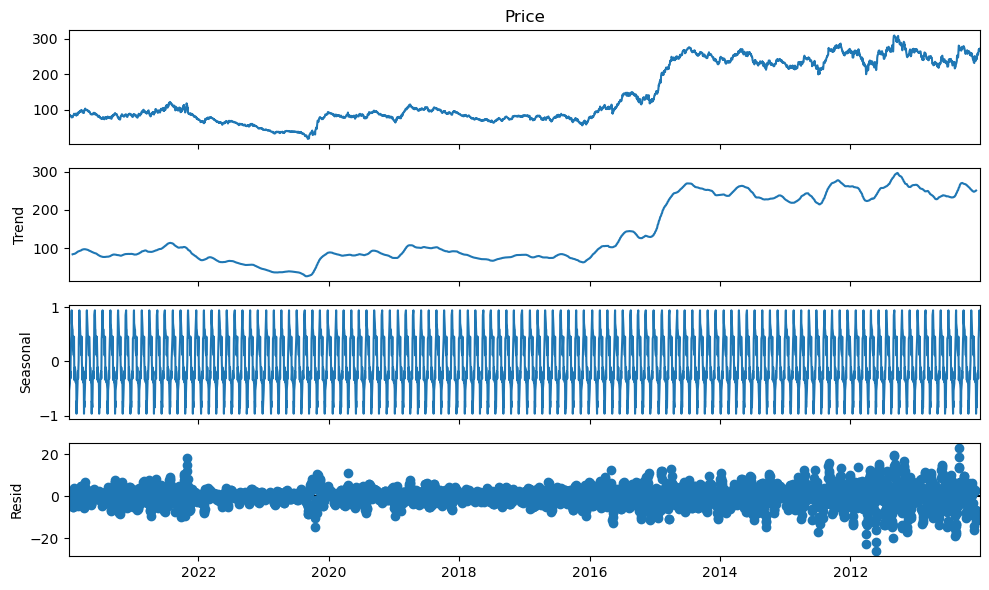

In [45]:
wti_decompose = seasonal_decompose(x = data['Price'], model="additive", period=30)
wti_decompose.plot()
plt.show()

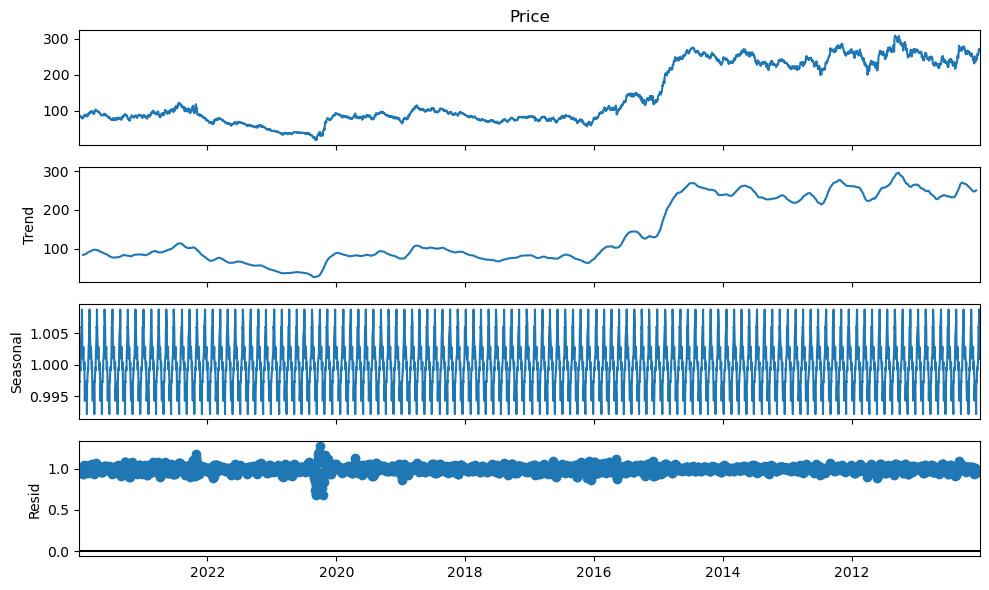

In [46]:
wti_decompose = seasonal_decompose(x = data['Price'], model="multiplicative", period=30)
wti_decompose.plot()
plt.show()

# Seasonality 

- Seasonality trong trading là một pattern thể hiện sự lặp đi lặp lại của giá trong một khoảng thời gian (một năm). Nó tương tự giống như dự báo thời tiết, hay mùa vụ trong sản xuất nó giải thích tại sao giá thường cao hoặc thấp hơn trong một số mùa, ngày trong năm
- Ví dụ như một công ty sản xuất điều hòa nhiệt độ, sẽ bán được nhiều hơn vào mùa hè => doanh thu cao => giá cổ phiếu cũng sẽ cao và mùa đông thì ngược lại



In [39]:
wti_monthly_return = data['Price'].pct_change().groupby([data['Price'].index.year, data['Price'].index.month]).mean()

In [40]:
wti_monthly_return_list = []

for i in range(len(wti_monthly_return)) : 
    wti_monthly_return_list.append({'month' : wti_monthly_return.index[i][1], 'monthly_return': wti_monthly_return.iloc[i]})

wti_monthly_return_list = pd.DataFrame(wti_monthly_return_list, columns=['month', 'monthly_return'])


In [41]:
wti_monthly_return_list.dropna(inplace=True)

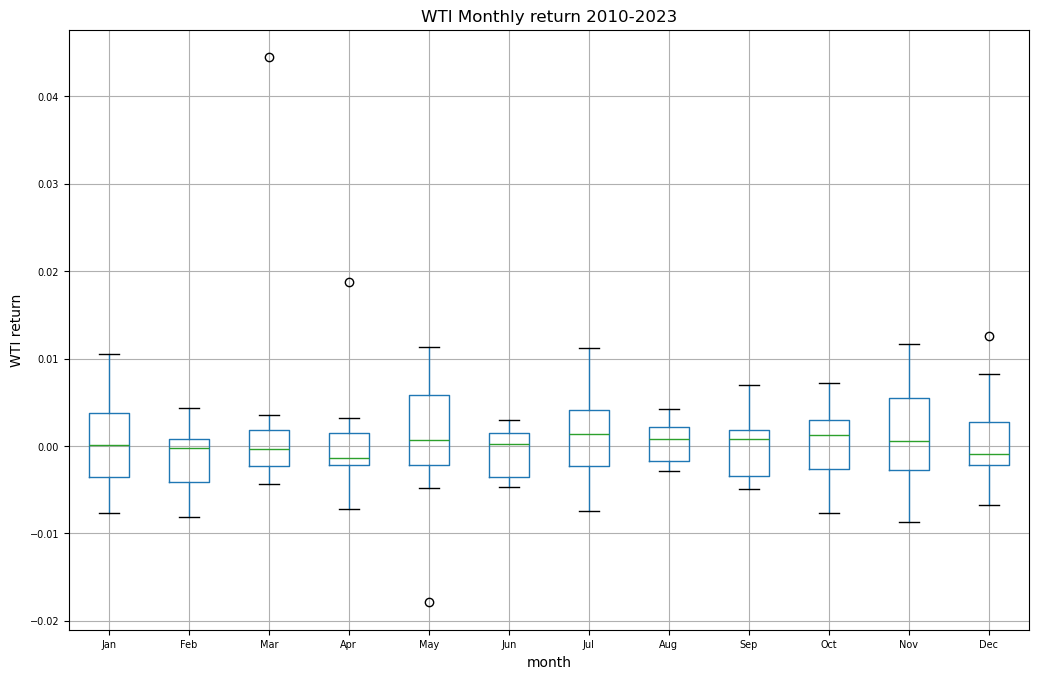

In [42]:
wti_monthly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('WTI return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("WTI Monthly return 2010-2023")

plt.suptitle("")
plt.show()

- Giá của cổ phiếu biến đổi theo tháng tương đối ổn định, vào tháng tư có có các điểm outlier lớn

# Rolling statistic và Stationary trong kiểu dữ liệu Time Series 


## Kiểu dữ liệu trong Time series 
- Stationary time series (chuỗi thời gian đứng yên) là kiểu dữ liệu có mean và variance là cố định, không thay đổi theo thời gian (hoặc sự thay đổi là nhỏ)
- Ngược lại Non-stationary time series là kiểu dữ liệu có mean và variance thay đổi lớn, phụ thuộc vào thời gian. Ta có thể biến kiểu dữ liệu này thành Stationary bằng cách sử dụng các phương pháp như: detrending, differencing

![Local Image](../Image/99388Stationary%20Vs%20Non-Stationary.png)

## Detecting time series stationarity
- Để kiểm tra xem time series có đứng yên hay không (stationarity), người ta sử dụng các kiểm định thống kê
- Có 2 kiểm định thống kê thường được sử dụng đó là ADF và KPSS. Chúng kiểm tra xem trong time series có unit roots (trend ngẫu nhiên trong time series)
- ADF có null hypothesis là tồn tại unit root trong dữ liệu còn KPSS thì ngược lại  

In [48]:
from statsmodels.tsa.stattools import adfuller, kpss

def output(test_output, test_type): 
    decision = "Non-Stationary"
    if test_type == 'adf' and test_output[1] < 0.05: decision = "Sationary"
    elif test_type == 'kpss' and test_output[1] >= 0.05: decision = "Sationary"

    return pd.Series(data={'Test Statistic': test_output[0], 'p-value': test_output[1], 'Numbers of lags': test_output[2], 'Decision':decision}, name=test_type)



def test_stationality(data): 
    adfoutput = adfuller(data)
    kpssoutput = kpss(data)

    return pd.concat([output(adfoutput, 'adf'), output(kpssoutput, 'kpss')], axis=1)


test_stationality(data['Price'])


C:\Users\Asus\AppData\Local\Temp\ipykernel_5468\2969237332.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssoutput = kpss(data)


,adf,kpss
Test Statistic,-0.56818,7.211621
p-value,0.878011,0.01
Numbers of lags,1,38
Decision,Non-Stationary,Non-Stationary


## Rolling statistic 
- Một cách để chuyển dữ liệu từ không đứng yên thành kiểu dữ liệu đứng yên (stationary) đó là sử dụng phương pháp Rolling statistic - tính MA với một window_size được định nghĩa trước

In [32]:
def rolling_statistic(data: pd.Series, window_size: int, title_text: str, y_text: str):
    plt.figure(figsize=(10, 6))
    data.plot(color='red', lw=0.5, label="Origin Price")
    data.rolling(window_size).mean().plot(color='green', lw=0.5, label="Mean" )
    data.rolling(window_size).std().plot(color="black", lw=0.5, label="Std price")
    plt.legend()
    plt.title(title_text)
    plt.ylabel(y_text)
    plt.show()


- Sử dụng rolling statistic loại bỏ trend và seasonality cho daily price 


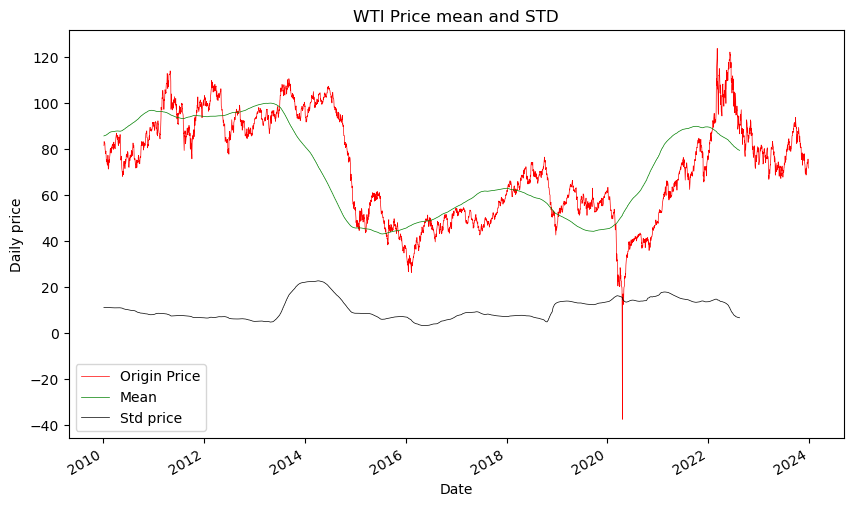

In [33]:
rolling_statistic(data['Price'], 365, "WTI Price mean and STD", "Daily price")

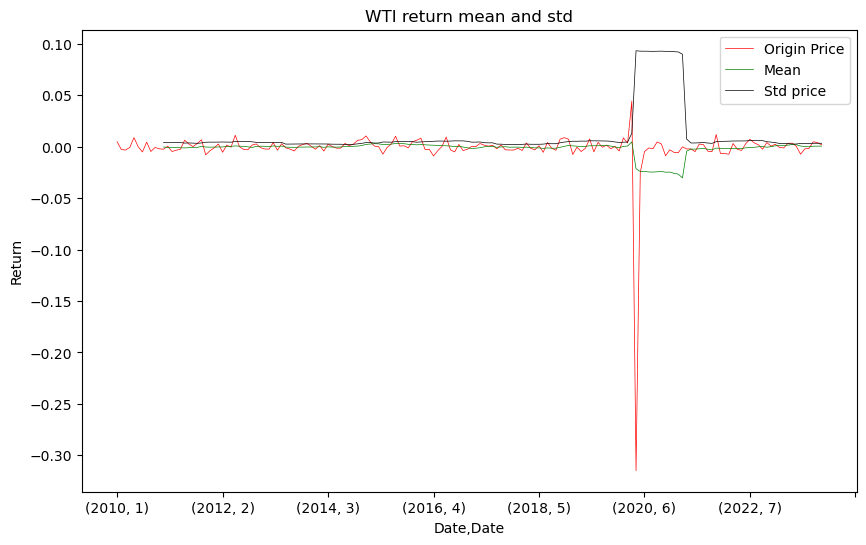

In [34]:
rolling_statistic(wti_monthly_return, 12, "WTI return mean and std", "Return")

=> Có thể thấy, hai time series (daily price và monthly_return) đều chứa trend và seasonality do đó chúng không được gọi là một stationality time series 
- Để loại bỏ trend ra khỏi tập dữ liệu, người ta trừ đi mean của rolling với size là 365. Tuy nhiên ta cần một phương thức nào đó để đánh giá xem liệu tập dữ liệu này đã loại bỏ trend hay chưa ? 

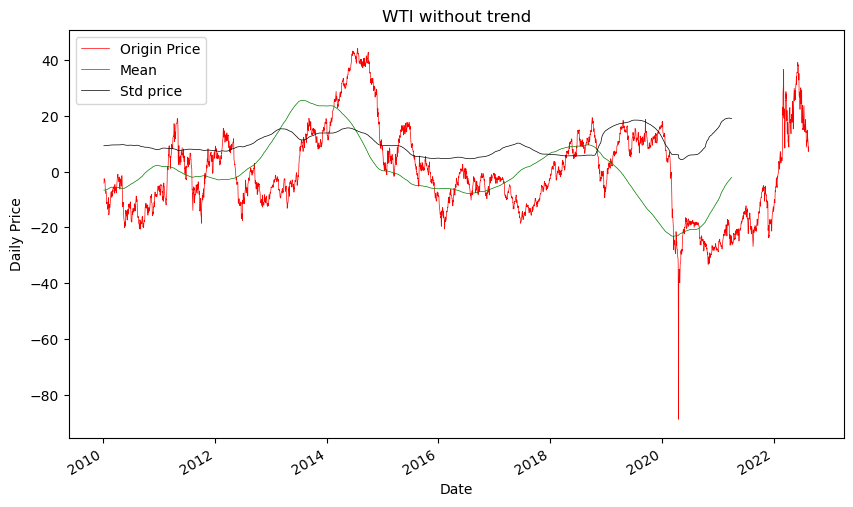

In [35]:
rolling_statistic(data['Price'] - data['Price'].rolling(365).mean(),365,  "WTI without trend", "Daily Price")

# Reference 
- [Time Series Analysis and Forecasting | Data-Driven Insights (Updated 2024)](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/)